<a href="https://colab.research.google.com/github/rumeysayuk/Machine-learning-classification/blob/main/ExploraryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/house-votes-84.csv')

In [ ]:
df.head(5)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


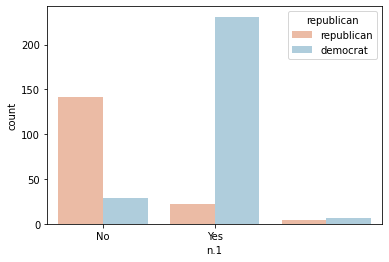

In [ ]:
#Visual EDA
plt.figure()
sns.countplot(x='n.1', hue='republican', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()


In [ ]:
# ? şeklindeki veriler için kullanılacaktır.u parametrenin varsayılanı “NaN”’dır(Not a Number). 
#strategy parametresini de ‘most_frequent’ olarak belirledik. Böylelikle, ‘?’ ile belirtilmiş değerler o sütunda hangi değer en çoksa
# ona eşitlenecek(yani sıklığına göre eğer ‘hayır’ oyları en fazlaysa ’n’ veya ‘evet’ oyları en fazlaysa ‘y’).
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='?', strategy='most_frequent')

In [ ]:
#KNN algoritması ile sınıflandırma problemleri çözülebilir.
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)

In [ ]:
steps = [('imputation', imputer),
('knn', knn_model)]

In [ ]:
#sklearn.pipeline metodunu kullanarak algoritmanızı, parametrelerinizi, veri önişleme adımlarınızı tek bir değişken
# (bizim steps adını verdiğimiz) içerisinde gruplayarak daha derli toplu kod yazabilirsiniz.
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [ ]:
#Elimizdeki veri kümesinden eğitim ve test kümeleri oluşturmaya. Bunun için train_test_split metodunu kullanacağız.
# Ayrıca 'republican' özelliğini hedef, diğer özellikleri ise tahminleyici olarak belirleyeceğiz.
#Veri kümemizdeki her bir verinin ‘repuplican’ değerlerini y değişkenine atadık. Ardından veri kümemizden bu değerleri düşürerek
#geri kalan değerleri X değişkenine atadık. Böylelikle tahminleyici ve hedef değişkenlerimizi oluşturmuş olduk.
#Ardından train_test_split metodunu kullanarak verimizi train ve test olarak ikiye ayırdık. Ayırırken, test_size parametresiyle 
#test kümemizin büyüklüğünü tüm verinin %30'u olarak belirledik. Geri kalanı da eğitim(train) verisi olarak ayırmış olduk.
from sklearn.model_selection import train_test_split
y = df['republican'].values
X = df.drop('republican', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df[df == 'n'] = 0
df[df == 'y'] = 1

In [ ]:
#verinin öğrenilmesi ve çıkarım yapılması var.
from sklearn.metrics import accuracy_score
knn_pipeline = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.8931297709923665

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'knn__n_neighbors': np.arange(1, 50)}
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [ ]:
cv.fit(X_train, y_train)
print("Tuned KNN Parameters: {}".format(cv.best_params_))
print("Best score is {}".format(cv.best_score_))

Tuned KNN Parameters: {'knn__n_neighbors': 3}
Best score is 0.947377049180328
